In [ ]:
                          #Assignment on Regularization using Ridge and Lasso on Car price predictions 

In [62]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
#Loading the data source
df=pd.read_csv(r'cars.csv')
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.2+ KB


In [65]:
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [66]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [67]:
df['normalized-losses'].value_counts()

normalized-losses
?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: count, dtype: int64

In [68]:
df['horsepower'].value_counts()

horsepower
68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
?       2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: count, dtype: int64

In [69]:
#Filling garbages with mean
df['normalized-losses']=df['normalized-losses'].replace('?','')
df['normalized-losses']=pd.to_numeric(df['normalized-losses'])
df['normalized-losses'].fillna(df['normalized-losses'].mean(),inplace = True)
df['normalized-losses']

0      122.0
1      122.0
2      122.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

In [70]:
df['horsepower']=df['horsepower'].replace('?','')
df['horsepower']=pd.to_numeric(df['horsepower'])
df['horsepower'].fillna(df['horsepower'].mean(),inplace = True)
df['horsepower']

0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
200    114.0
201    160.0
202    134.0
203    106.0
204    114.0
Name: horsepower, Length: 205, dtype: float64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.2+ KB


In [72]:
#Getting unique values of column
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [73]:
# Replacing garbage values
df['drive-wheels']=df['drive-wheels'].replace('4wd','fwd')
df['drive-wheels'].unique()

array(['rwd', 'fwd'], dtype=object)

In [74]:
df.describe()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,65.907805,53.724878,126.907317,104.256158,25.219512,30.751220,13227.478049
std,1.245307,31.681008,2.145204,2.443522,41.642693,39.519211,6.542142,6.886443,7902.651615
min,-2.000000,65.000000,60.300000,47.800000,61.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,64.100000,52.000000,97.000000,70.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,65.500000,54.100000,120.000000,95.000000,24.000000,30.000000,10345.000000
75%,2.000000,137.000000,66.900000,55.500000,141.000000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,72.300000,59.800000,326.000000,288.000000,49.000000,54.000000,45400.000000


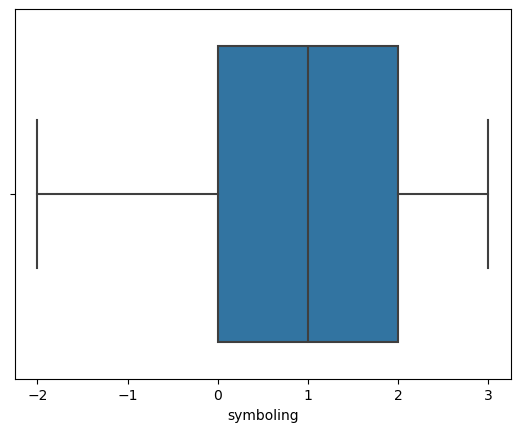

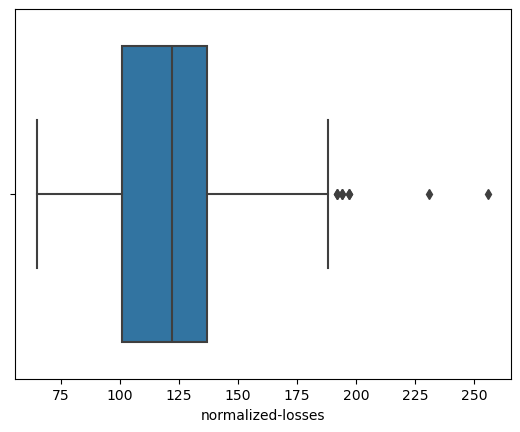

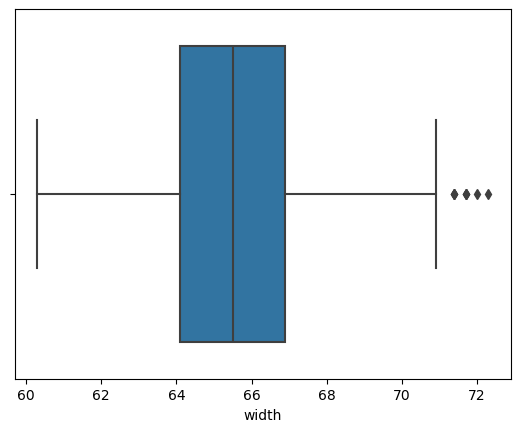

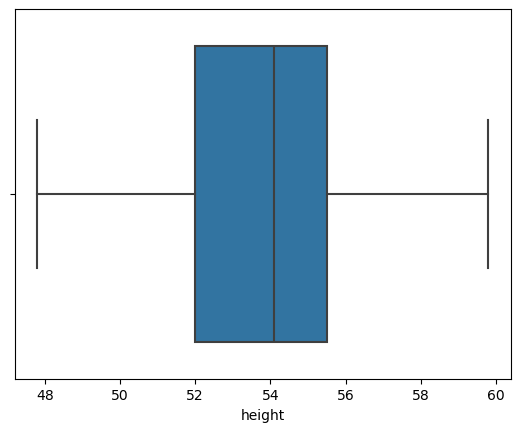

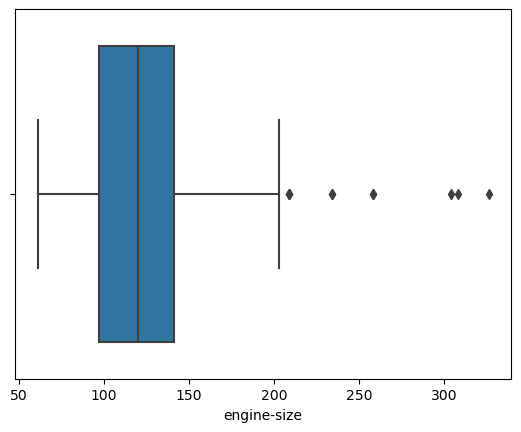

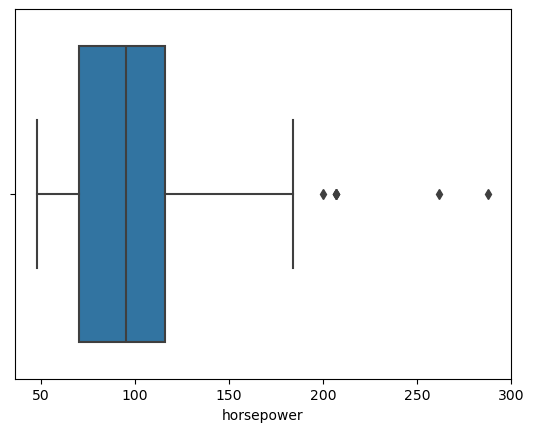

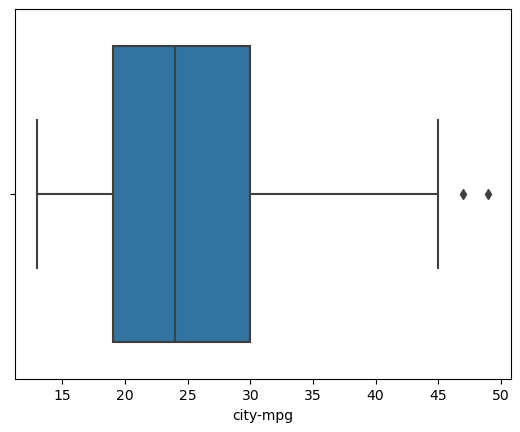

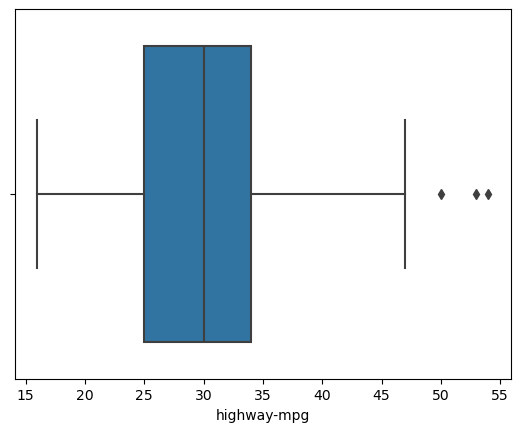

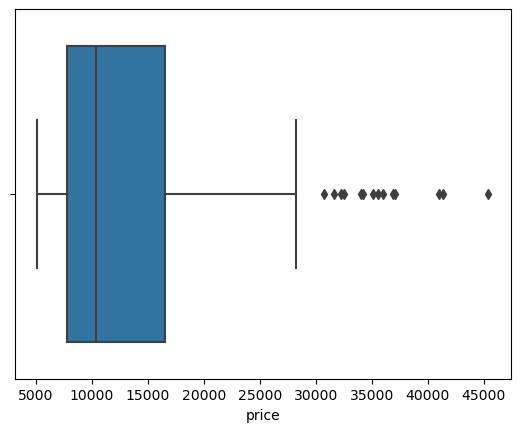

In [75]:
#Treatment of outliers
for i in df.select_dtypes(include= 'number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [76]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'body-style',
       'drive-wheels', 'engine-location', 'width', 'height', 'engine-type',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [77]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [78]:
wisker(df['normalized-losses'])

(47.0, 191.0)

In [79]:
for i in ('normalized-losses','width','engine-size','horsepower','city-mpg','highway-mpg','price'):
    lw,uw =wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

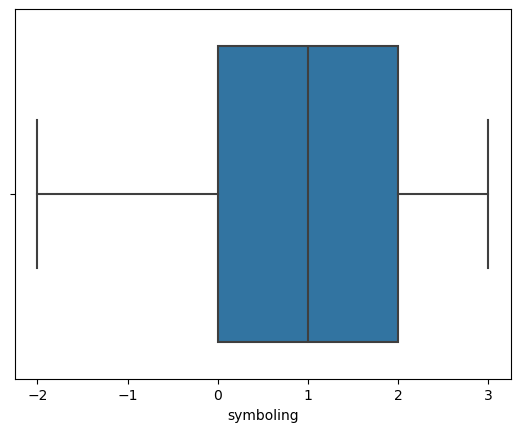

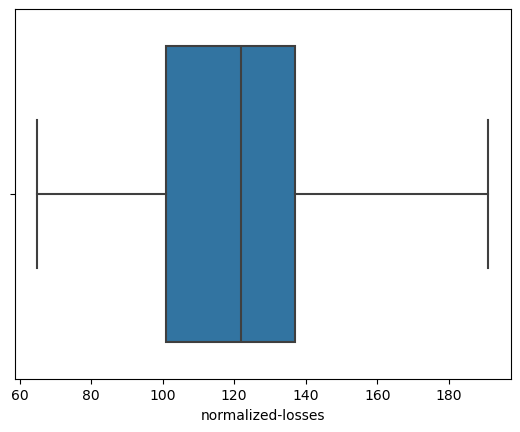

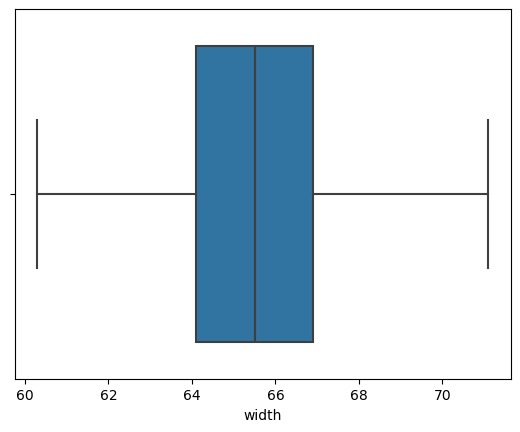

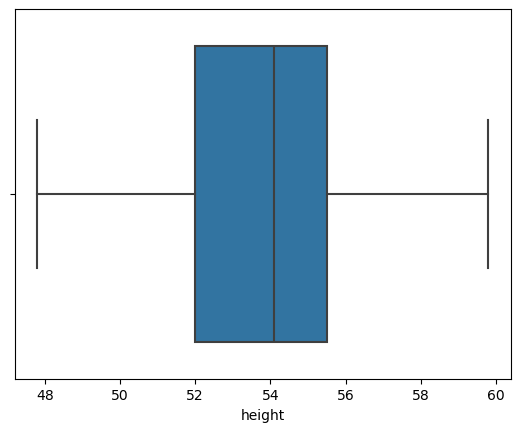

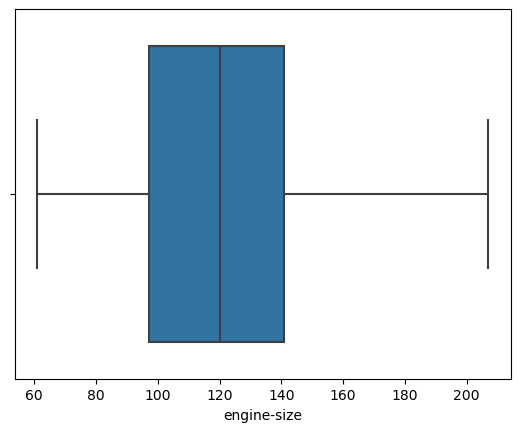

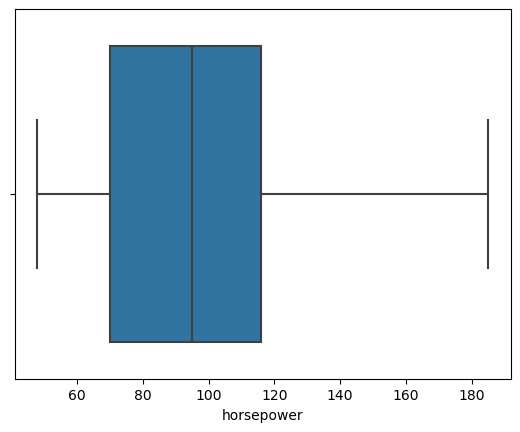

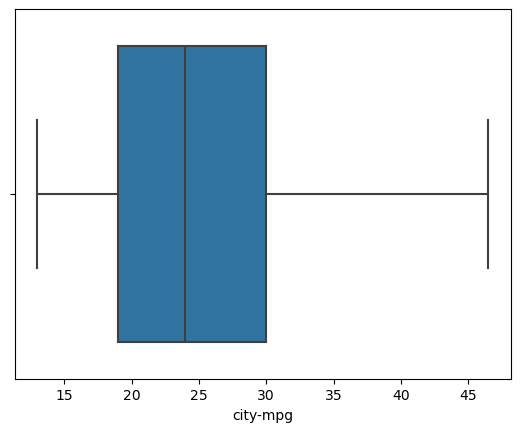

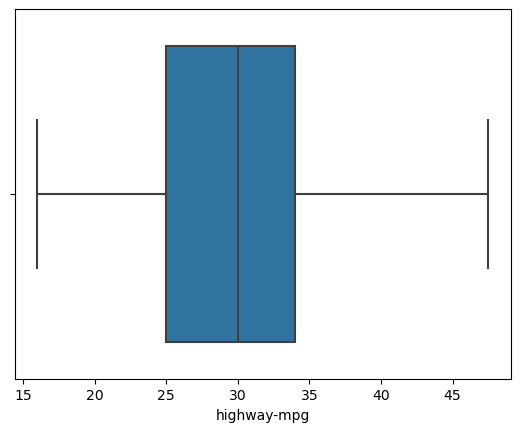

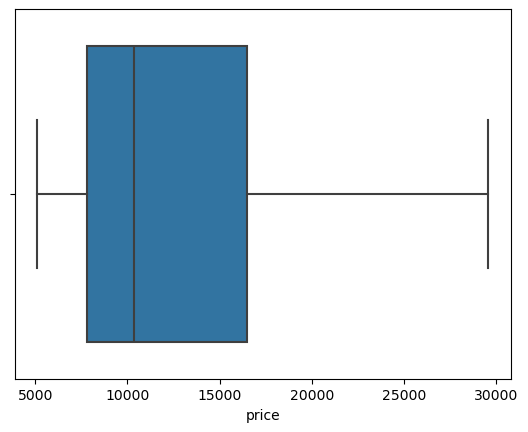

In [80]:
for i in df.select_dtypes(include= 'number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [81]:
#Categorising the data in to numaricals and categorical
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes(object)

In [82]:
df_num.corr()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.469436,-0.235697,-0.541038,-0.100869,0.065143,-0.038222,0.027178,-0.099563
normalized-losses,0.469436,1.000000,0.092558,-0.369797,0.126018,0.223390,-0.223872,-0.186393,0.162941
width,-0.235697,0.092558,1.000000,0.283227,0.740015,0.651120,-0.649570,-0.686316,0.743972
height,-0.541038,-0.369797,0.283227,1.000000,0.101874,-0.066613,-0.046677,-0.104647,0.156113
engine-size,-0.100869,0.126018,0.740015,0.101874,1.000000,0.840936,-0.687708,-0.702115,0.828501
horsepower,0.065143,0.223390,0.651120,-0.066613,0.840936,1.000000,-0.844550,-0.830353,0.783215
city-mpg,-0.038222,-0.223872,-0.649570,-0.046677,-0.687708,-0.844550,1.000000,0.966524,-0.682572
highway-mpg,0.027178,-0.186393,-0.686316,-0.104647,-0.702115,-0.830353,0.966524,1.000000,-0.711308
price,-0.099563,0.162941,0.743972,0.156113,0.828501,0.783215,-0.682572,-0.711308,1.000000


In [83]:
#Importing sklearn to label the categorical data
from sklearn.preprocessing import LabelEncoder

In [84]:
# Encoding the categorical columns
for i in df_cat:
    le=LabelEncoder()
    df_cat[i]=le.fit_transform(df_cat[i])

In [85]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,1,0,0
1,0,1,0,1,0,0
2,0,1,2,1,0,5
3,1,1,3,0,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,21,1,3,1,0,3
201,21,1,3,1,0,3
202,21,1,3,1,0,5
203,21,0,3,1,0,3


In [115]:
# Concatenation of both categorical labelled and numerical columns
df_final=pd.concat([df_cat,df_num],axis=1)
df_final

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,1,0,0,3,122.0,64.1,48.8,130.0,111.0,21.0,27.0,13495.0
1,0,1,0,1,0,0,3,122.0,64.1,48.8,130.0,111.0,21.0,27.0,16500.0
2,0,1,2,1,0,5,1,122.0,65.5,52.4,152.0,154.0,19.0,26.0,16500.0
3,1,1,3,0,0,3,2,164.0,66.2,54.3,109.0,102.0,24.0,30.0,13950.0
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136.0,115.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,3,1,0,3,-1,95.0,68.9,55.5,141.0,114.0,23.0,28.0,16845.0
201,21,1,3,1,0,3,-1,95.0,68.8,55.5,141.0,160.0,19.0,25.0,19045.0
202,21,1,3,1,0,5,-1,95.0,68.9,55.5,173.0,134.0,18.0,23.0,21485.0
203,21,0,3,1,0,3,-1,95.0,68.9,55.5,145.0,106.0,26.0,27.0,22470.0


In [87]:
# Separating dependent and independent columns
x=df_final.iloc[:,:-1]
y=df_final.iloc[:,-1]

In [88]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [89]:
# Baiting regression models
from sklearn.linear_model import LinearRegression
lr = Le=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [90]:
print(xtrain.shape)
print(ytrain.shape)


(143, 14)
(143,)


In [91]:
train = lr.score(xtrain,ytrain)
train

0.8312020562232008

In [96]:
predict = lr.predict(xtest)
predict

array([ 4960.45656983, 18471.94110337,  9472.02354042, 11410.02358886,
       12735.49918497, 11410.02358886,  8487.54721897, 12945.46453476,
        7324.28255595,  8365.16322637,  4740.13906551,  5869.75958744,
       11409.18514342,  8764.17653794,  5393.32709483,  8462.35336051,
       16555.73433659,  6097.98699257, 12852.53520106,  7349.24220189,
       14659.46512786,  8649.00963843, 19049.05865611, 14128.8840234 ,
       13048.28703723, 13010.15951578, 15770.62421571, 12927.7710216 ,
        9409.07535484, 13680.24856158,  7203.18063485, 24828.42822175,
       16155.75825542, 11118.71393438,  8472.65126054, 11145.32854415,
       11828.65209949,  9120.07185055, 29381.5888455 , 20516.23052595,
       24466.23542502, 10980.9316664 , 16762.105457  ,  9728.99170644,
       10412.47755418,  7387.53738475, 20612.89720246,  7706.03000892,
        7755.24338157, 21931.25748282,  5438.27555594,  6592.6321623 ,
        5115.04326293,  7573.57862306, 19730.60692277,  8024.52452866,
      

In [97]:
#finding r2 score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(ytest,predict)

0.8108753261406867

In [98]:
lr.score(xtest,ytest)

0.8108753261406867

In [99]:
#Importing Ridge and Lasso for Regularisation
from sklearn.linear_model import Ridge,Lasso

In [100]:
l2=Ridge(alpha=1.0)
l2.fit(xtrain,ytrain)

Ridge()

In [101]:
l2.score(xtrain,ytrain)

0.8266130937817096

In [102]:
l2.score(xtest,ytest)

0.809899581188372

In [103]:
for i in range(1,25):
    l2=Ridge(alpha=i)
    l2.fit(xtrain,ytrain)
    predict=l2.score(xtest,ytest)
    print(f"value of alpha {i} test score is {predict}")


value of alpha 1 test score is 0.809899581188372
value of alpha 2 test score is 0.8048898093901892
value of alpha 3 test score is 0.8005477361950564
value of alpha 4 test score is 0.7969582112924387
value of alpha 5 test score is 0.7939473088865799
value of alpha 6 test score is 0.7913738365725701
value of alpha 7 test score is 0.7891389485476981
value of alpha 8 test score is 0.7871733415055848
value of alpha 9 test score is 0.7854270712869813
value of alpha 10 test score is 0.7838630227798454
value of alpha 11 test score is 0.7824528236946798
value of alpha 12 test score is 0.7811742457918365
value of alpha 13 test score is 0.7800095065909443
value of alpha 14 test score is 0.778944126556179
value of alpha 15 test score is 0.7779661379683362
value of alpha 16 test score is 0.7770655226725574
value of alpha 17 test score is 0.7762338028272868
value of alpha 18 test score is 0.7754637365509178
value of alpha 19 test score is 0.7747490871892605
value of alpha 20 test score is 0.77408444

In [104]:
for i in range(1,25):
    l1=Lasso(alpha=i)
    l1.fit(xtrain,ytrain)
    train = l1.score(xtrain,ytrain)
    predict=l1.score(xtest,ytest)
    print(f"value of alpha {i} test score is {predict} and train_score is {train}")


value of alpha 1 test score is 0.8110362165879994 and train_score is 0.8311994592152124
value of alpha 2 test score is 0.8111907643911196 and train_score is 0.8311916683833858
value of alpha 3 test score is 0.8113391007957023 and train_score is 0.8311786837261415
value of alpha 4 test score is 0.8114809562501362 and train_score is 0.8311605060429368
value of alpha 5 test score is 0.8116167070386469 and train_score is 0.8311371345393674
value of alpha 6 test score is 0.8117459792288709 and train_score is 0.8311085706492027
value of alpha 7 test score is 0.8118690751983079 and train_score is 0.8310748133981614
value of alpha 8 test score is 0.8119859979047308 and train_score is 0.831035862691933
value of alpha 9 test score is 0.8120967505815349 and train_score is 0.830991718424403
value of alpha 10 test score is 0.8122010737773311 and train_score is 0.8309423824567294
value of alpha 11 test score is 0.8122991984125876 and train_score is 0.8308878533800671
value of alpha 12 test score is 

In [107]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [108]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [109]:
print(xtrain.shape)
print(ytrain.shape)


(164, 14)
(164,)


In [117]:
# Getting R2  score after regularisation using ridge and lasso
predict=lr.predict(xtest)
r2_score(predict,ytest)

0.68754194038787

In [116]:
# prediction score
lr.score(xtest,ytest)

0.7467051237141892